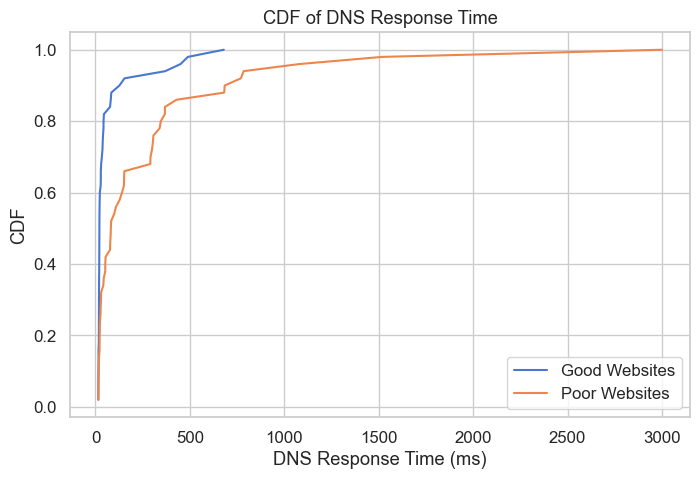

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path1 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/Direct_query/dns_cf_do53_top.csv"
path2 = "/Users/tejasmacipad/Desktop/final_CN_project/CN_Project/Report/Direct_query/dns_cf_do53_bot50d.csv"

# Load CSV
df_good = pd.read_csv(path1)
df_bad = pd.read_csv(path2)

# CDF function
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=label)

plt.figure(figsize=(8,5))
plot_cdf(df_good['rtt_ms'], 'Good Websites')
plot_cdf(df_bad['rtt_ms'], 'Poor Websites')
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("CDF")
plt.title("CDF of DNS Response Time")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_75968/3803817349.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Below50', 'Top50'])


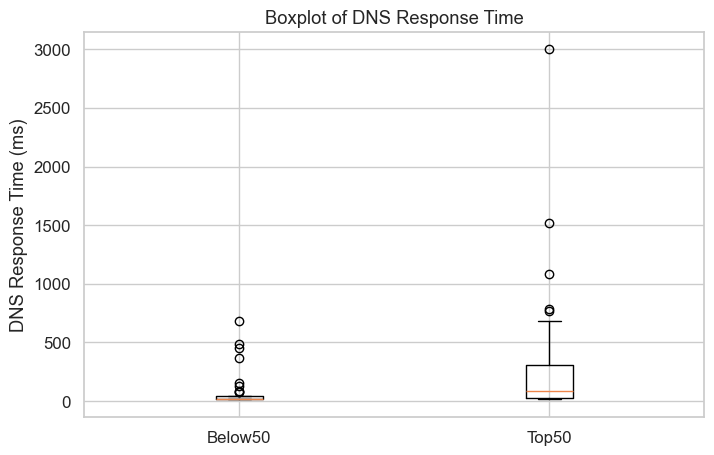

In [19]:
plt.figure(figsize=(8,5))
data = [df_good['rtt_ms'], df_bad['rtt_ms']]
plt.boxplot(data, labels=['Below50', 'Top50'])
plt.ylabel("DNS Response Time (ms)")
plt.title("Boxplot of DNS Response Time")
plt.show()

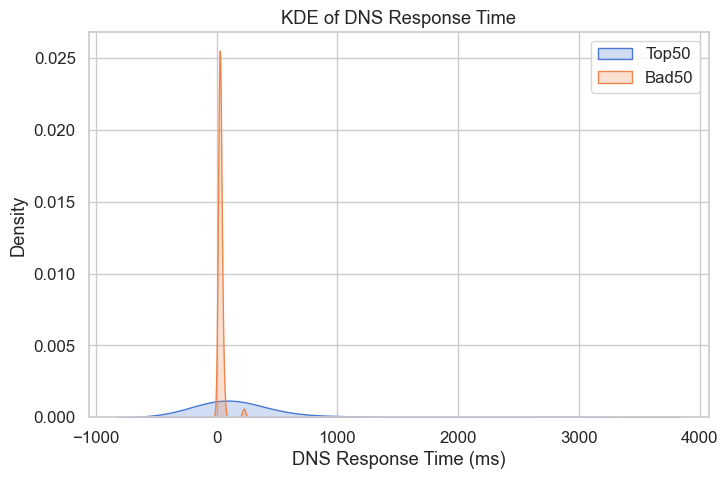

In [15]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(df_good['rtt_ms'], label='Top50', fill=True)
sns.kdeplot(df_bad['rtt_ms'], label='Bad50', fill=True)
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("Density")
plt.title("KDE of DNS Response Time")
plt.legend()
plt.show()

## Refined Code

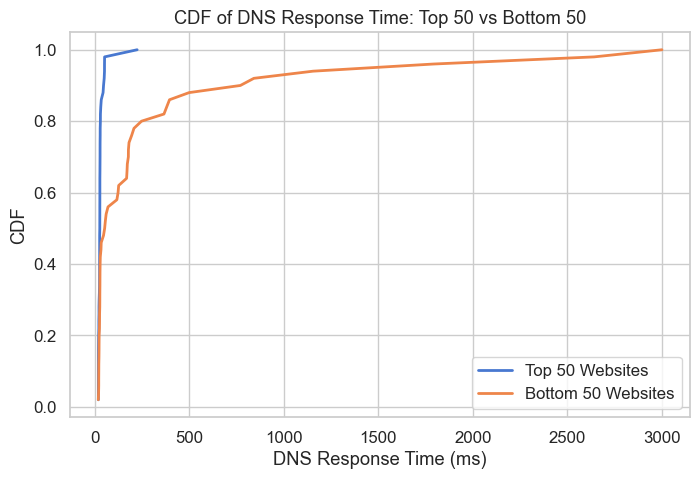

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Paths to CSVs
path_top50 = "/Users/tejasmacipad/Desktop/CN/FinalProject/CN_Project/Report/Direct_query/dns_cf_do53_top.csv"
path_bottom50 = "/Users/tejasmacipad/Desktop/CN/FinalProject/CN_Project/Report/Direct_query/dns_cf_do53.csv"

# Load CSVs
df_top50 = pd.read_csv(path_top50)
df_bottom50 = pd.read_csv(path_bottom50)

# ==============================
# 1️⃣ CDF of DNS Response Time
# ==============================
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=label, linewidth=2)

plt.figure(figsize=(8,5))
plot_cdf(df_top50['rtt_ms'], 'Top 50 Websites')
plot_cdf(df_bottom50['rtt_ms'], 'Bottom 50 Websites')
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("CDF")
plt.title("CDF of DNS Response Time: Top 50 vs Bottom 50")
plt.grid(True)
plt.legend()
plt.show()


/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_75968/3401869459.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Top 50', 'Bottom 50'], patch_artist=True,


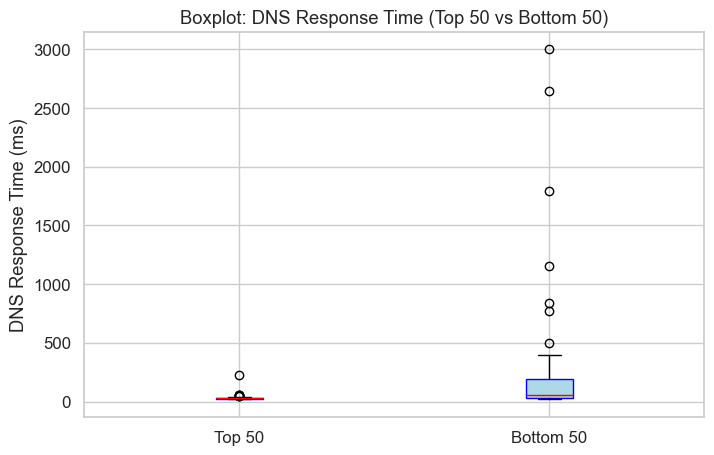

In [9]:

# ==============================
# 2️⃣ Boxplot of DNS Response Time
# ==============================
plt.figure(figsize=(8,5))
data = [df_top50['rtt_ms'], df_bottom50['rtt_ms']]
plt.boxplot(data, labels=['Top 50', 'Bottom 50'], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.ylabel("DNS Response Time (ms)")
plt.title("Boxplot: DNS Response Time (Top 50 vs Bottom 50)")
plt.show()

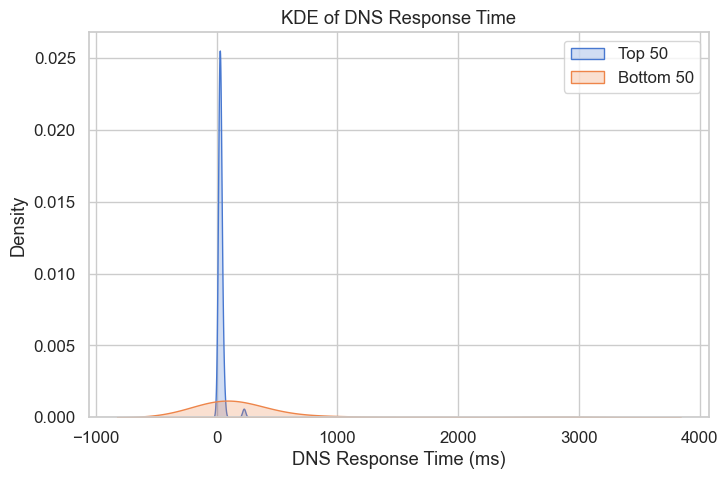

In [10]:

# ==============================
# 3️⃣ KDE / Histogram of DNS Response Time
# ==============================
plt.figure(figsize=(8,5))
sns.kdeplot(df_top50['rtt_ms'], label='Top 50', fill=True)
sns.kdeplot(df_bottom50['rtt_ms'], label='Bottom 50', fill=True)
plt.xlabel("DNS Response Time (ms)")
plt.ylabel("Density")
plt.title("KDE of DNS Response Time")
plt.legend()
plt.show()


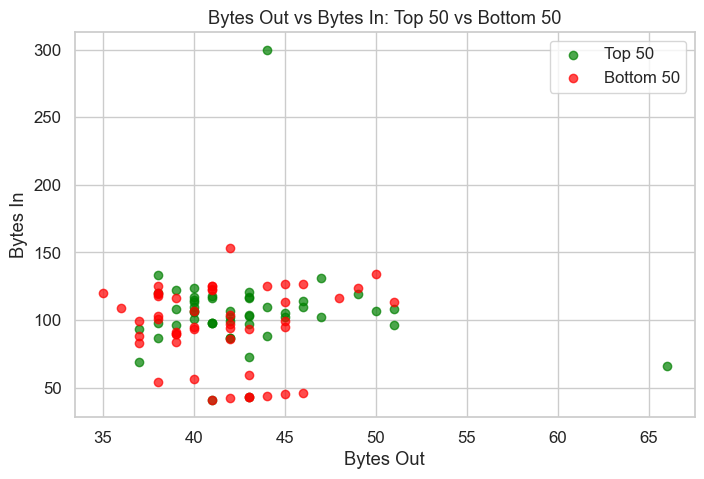

In [11]:

# ==============================
# 4️⃣ Bytes Out vs Bytes In Scatter
# ==============================
plt.figure(figsize=(8,5))
plt.scatter(df_top50['bytes_out'], df_top50['bytes_in'], label='Top 50', alpha=0.7, color='green')
plt.scatter(df_bottom50['bytes_out'], df_bottom50['bytes_in'], label='Bottom 50', alpha=0.7, color='red')
plt.xlabel("Bytes Out")
plt.ylabel("Bytes In")
plt.title("Bytes Out vs Bytes In: Top 50 vs Bottom 50")
plt.legend()
plt.grid(True)
plt.show()


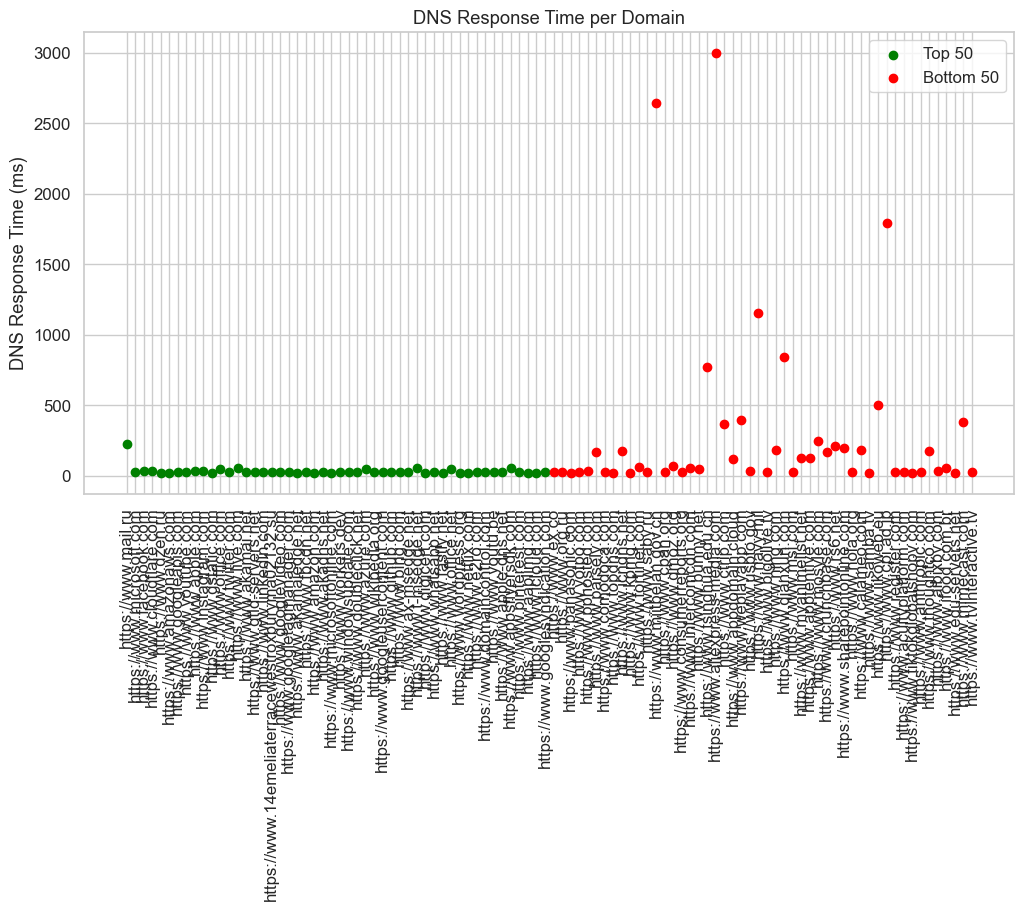

In [12]:

# ==============================
# 5️⃣ RTT vs Domain Scatter
# ==============================
plt.figure(figsize=(12,6))
plt.scatter(df_top50['domain'], df_top50['rtt_ms'], label='Top 50', color='green')
plt.scatter(df_bottom50['domain'], df_bottom50['rtt_ms'], label='Bottom 50', color='red')
plt.xticks(rotation=90)
plt.ylabel("DNS Response Time (ms)")
plt.title("DNS Response Time per Domain")
plt.legend()
plt.grid(True)
plt.show()


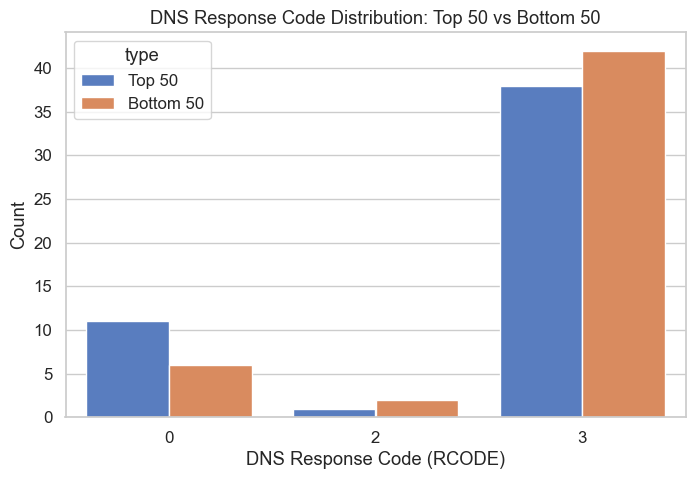

In [13]:

# ==============================
# 6️⃣ DNS Response Code Distribution
# ==============================
df_top50['type'] = 'Top 50'
df_bottom50['type'] = 'Bottom 50'
df_combined = pd.concat([df_top50, df_bottom50])

plt.figure(figsize=(8,5))
sns.countplot(x='rcode', hue='type', data=df_combined)
plt.xlabel("DNS Response Code (RCODE)")
plt.ylabel("Count")
plt.title("DNS Response Code Distribution: Top 50 vs Bottom 50")
plt.show()